# MLScope: Machine Learning for News Popularity Prediction

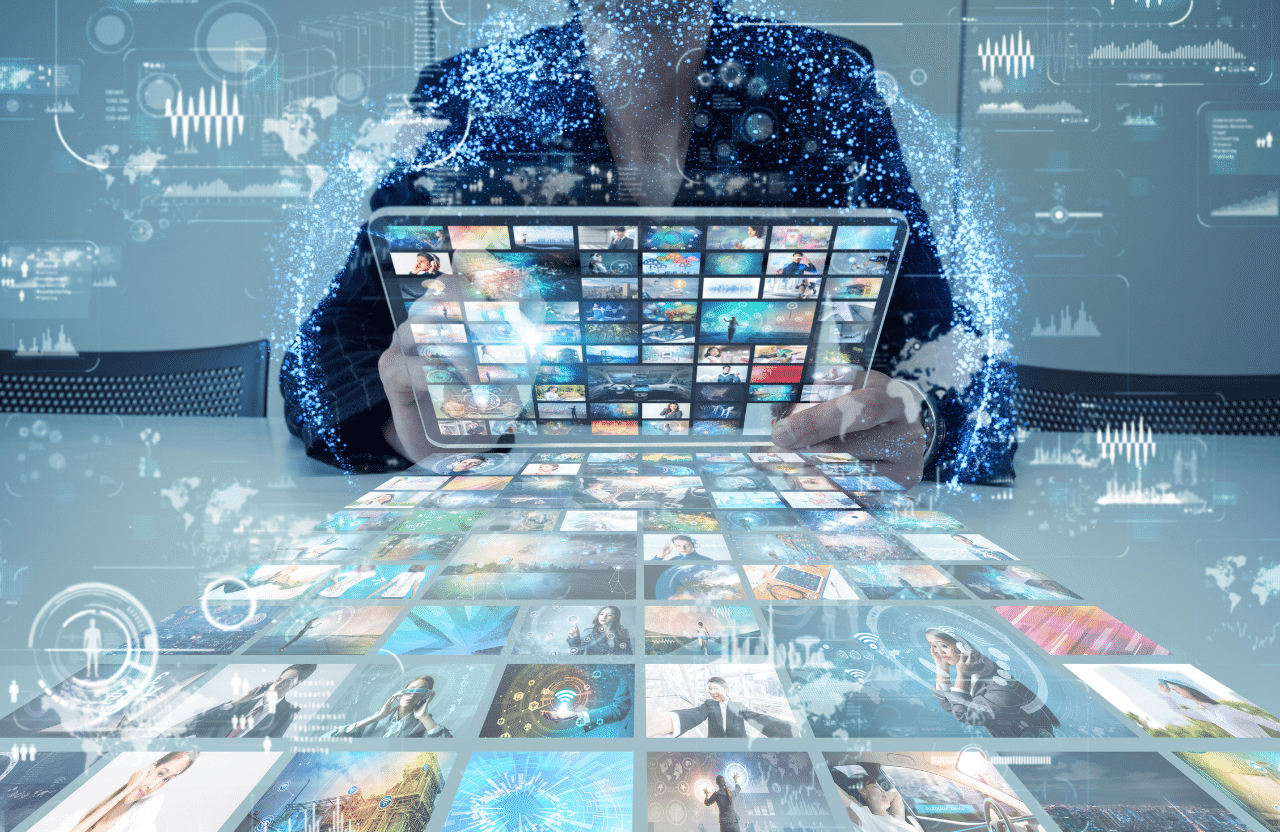

## Table of Contents :
### 1.Introduction
### 2.Goal Of the Project
### 3.Data Story
### 4.Data Preprocessing

### 1.Introduction
  In this research, the Scikit-learn library was employed to develop and refine predictive models for a binary classification task. Specifically, articles were classified as "popular" if their share count exceeded a predefined threshold (D1) and as "unpopular" otherwise. Five machine learning algorithms were tested: 
**Random Forest (RF), Adaptive Boosting (AdaBoost), Support Vector Machine (SVM) with a Radial Basis Function (RBF) kernel, K-Nearest Neighbors (KNN), and Naïve Bayes (NB).**
To optimize the performance of these models, a comprehensive grid search was conducted to identify the best hyperparameters, including the number of trees for RF and AdaBoost, the regularization parameter (C) for SVM, and the number of neighbors for KNN. The training data was initially partitioned into 70% for training and 30% for validation through a random holdout method. Once the optimal hyperparameters were determined, the models were trained using the complete training dataset to ensure robust predictions.

### 2.Goal Of the Project
   The goal of this capstone project is to develop and evaluate machine learning models for predicting the popularity of online articles based on a binary classification framework. By utilizing advanced algorithms and optimizing their hyperparameters, the research aims to identify the most effective techniques for classifying articles as "popular" or "unpopular" based on their share counts. This project contributes to the understanding of how predictive modeling can be leveraged in real-world applications, such as digital marketing, content strategy, and audience engagement analytics.

### 3.Data Story
   The dataset utilized in this project was sourced from the UC Irvine Machine Learning Repository, a well-recognized platform for curated datasets. Specifically, the data is the Online News Popularity dataset, which provides detailed attributes of online news articles published by Mashable. It includes metrics such as the number of shares, various content features (e.g., word count, topic category), and social media engagement metrics. The dataset's structure and richness offer a robust foundation for predictive modeling and classification tasks, supporting the development of machine learning models aimed at classifying article popularity.
The dataset can be accessed at the following link: [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/datasets?search=OnlineNewsPopularity.csv)


 **Dataset Description**
 
- Number of Entries: The dataset contains 39,644 rows, representing individual articles.
- Number of Features: There are 61 columns in total, including:
- Feature columns: 59 numerical attributes (e.g., content metrics, sentiment scores).
- Target column: The  column, which represents the number of times an article was shared and serves as the target variable for classification
        

### Features/columns:
- The dataset consists of 61 columns, each capturing specific attributes of online news articles.  including the target column representing the number of shares.


#### TOOL USED

## Data Preprocessing

**1. Importing Libraries**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

**2. Load the dataset**

In [14]:
data = pd.read_csv('OnlineNewsPopularity.csv')


**3.Understand the data structure**

In [16]:
data.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0              2.0        1.0  ...   
1                   0.791946         3.0              1.0        1.0  ...   
2                   0.663866         3.0              1.0        1.0  ...   
3                   0.665635         9.0              0.0        1.0  ...   
4                   0.540890        19.0             19.0       20.0  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   

    title_sentiment_polarity   abs_title_subjectivity  \
0                  -0.187500                 0.000000   
1                   0.000000                 0.500000   
2                   0.000000                 0.500000   
3                   0.000000                 0.500000   
4                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares  
0                       0.187500      593  
1                       0.000000      711  
2                       0.000000     1500  
3                       0.000000     1200  
4                       0.136364      505  

[5 rows x 61 columns]

In [17]:
data.shape

(39644, 61)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

Dataset Overview

- 39644 rows (entries)
- 61 columns (features)
- float64(59), int64(1), object(1)

In [20]:
# Check unique values for 'aspiration'
print("Unique values in 'url':", data['url'].unique())


Unique values in 'url': ['http://mashable.com/2013/01/07/amazon-instant-video-browser/'
 'http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/'
 'http://mashable.com/2013/01/07/apple-40-billion-app-downloads/' ...
 'http://mashable.com/2014/12/27/son-pays-off-mortgage/'
 'http://mashable.com/2014/12/27/ukraine-blasts/'
 'http://mashable.com/2014/12/27/youtube-channels-2015/']


In [21]:
# Ensure all columns are displayed in the output
pd.set_option('display.max_columns', 60)

# Use describe() as usual
print(data.describe())


          timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  39644.000000    39644.000000      39644.000000     39644.000000   
mean     354.530471       10.398749        546.514731         0.548216   
std      214.163767        2.114037        471.107508         3.520708   
min        8.000000        2.000000          0.000000         0.000000   
25%      164.000000        9.000000        246.000000         0.470870   
50%      339.000000       10.000000        409.000000         0.539226   
75%      542.000000       12.000000        716.000000         0.608696   
max      731.000000       23.000000       8474.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      39644.000000              39644.000000  39644.000000   
mean           0.996469                  0.689175     10.883690   
std            5.231231                  3.264816     11.332017   
min            0.000000                  0.000000      0.000000  

In [22]:
# Dropping the unnecessary columns (eyeball check!)
data.drop(['url',' timedelta'],axis=1,inplace=True)

 0. url:                           URL of the article (non-predictive)
     1. timedelta:                     Days between the article publication and the dataset acquisition (non-predictive)

In [24]:
data.columns


Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' gl

In [25]:
data.shape


(39644, 59)

**4.Handle Missing Data**

In [27]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_share

After checking the missing values in the dataframe, it shows there are no missing values. As no null values, dropna() not used.

**5.Handle Duplicates**

In [30]:
data.duplicated().sum()

0

no duplicates in dataset 

**6.Handle outliers**

In [33]:
data.skew().sort_values(ascending=True)

average_token_length              -4.576012
max_negative_polarity             -3.459747
kw_max_max                        -2.644982
rate_positive_words               -1.423106
global_subjectivity               -1.372689
max_positive_polarity             -0.939756
avg_positive_polarity             -0.724795
abs_title_subjectivity            -0.624149
avg_negative_polarity             -0.551644
num_keywords                      -0.147251
min_negative_polarity             -0.073155
global_sentiment_polarity          0.105457
n_tokens_title                     0.165320
global_rate_positive_words         0.323047
title_sentiment_polarity           0.396109
rate_negative_words                0.407241
kw_min_avg                         0.467976
kw_avg_max                         0.624310
title_subjectivity                 0.816085
LDA_04                             1.173129
LDA_03                             1.238716
LDA_02                             1.311695
data_channel_is_world           

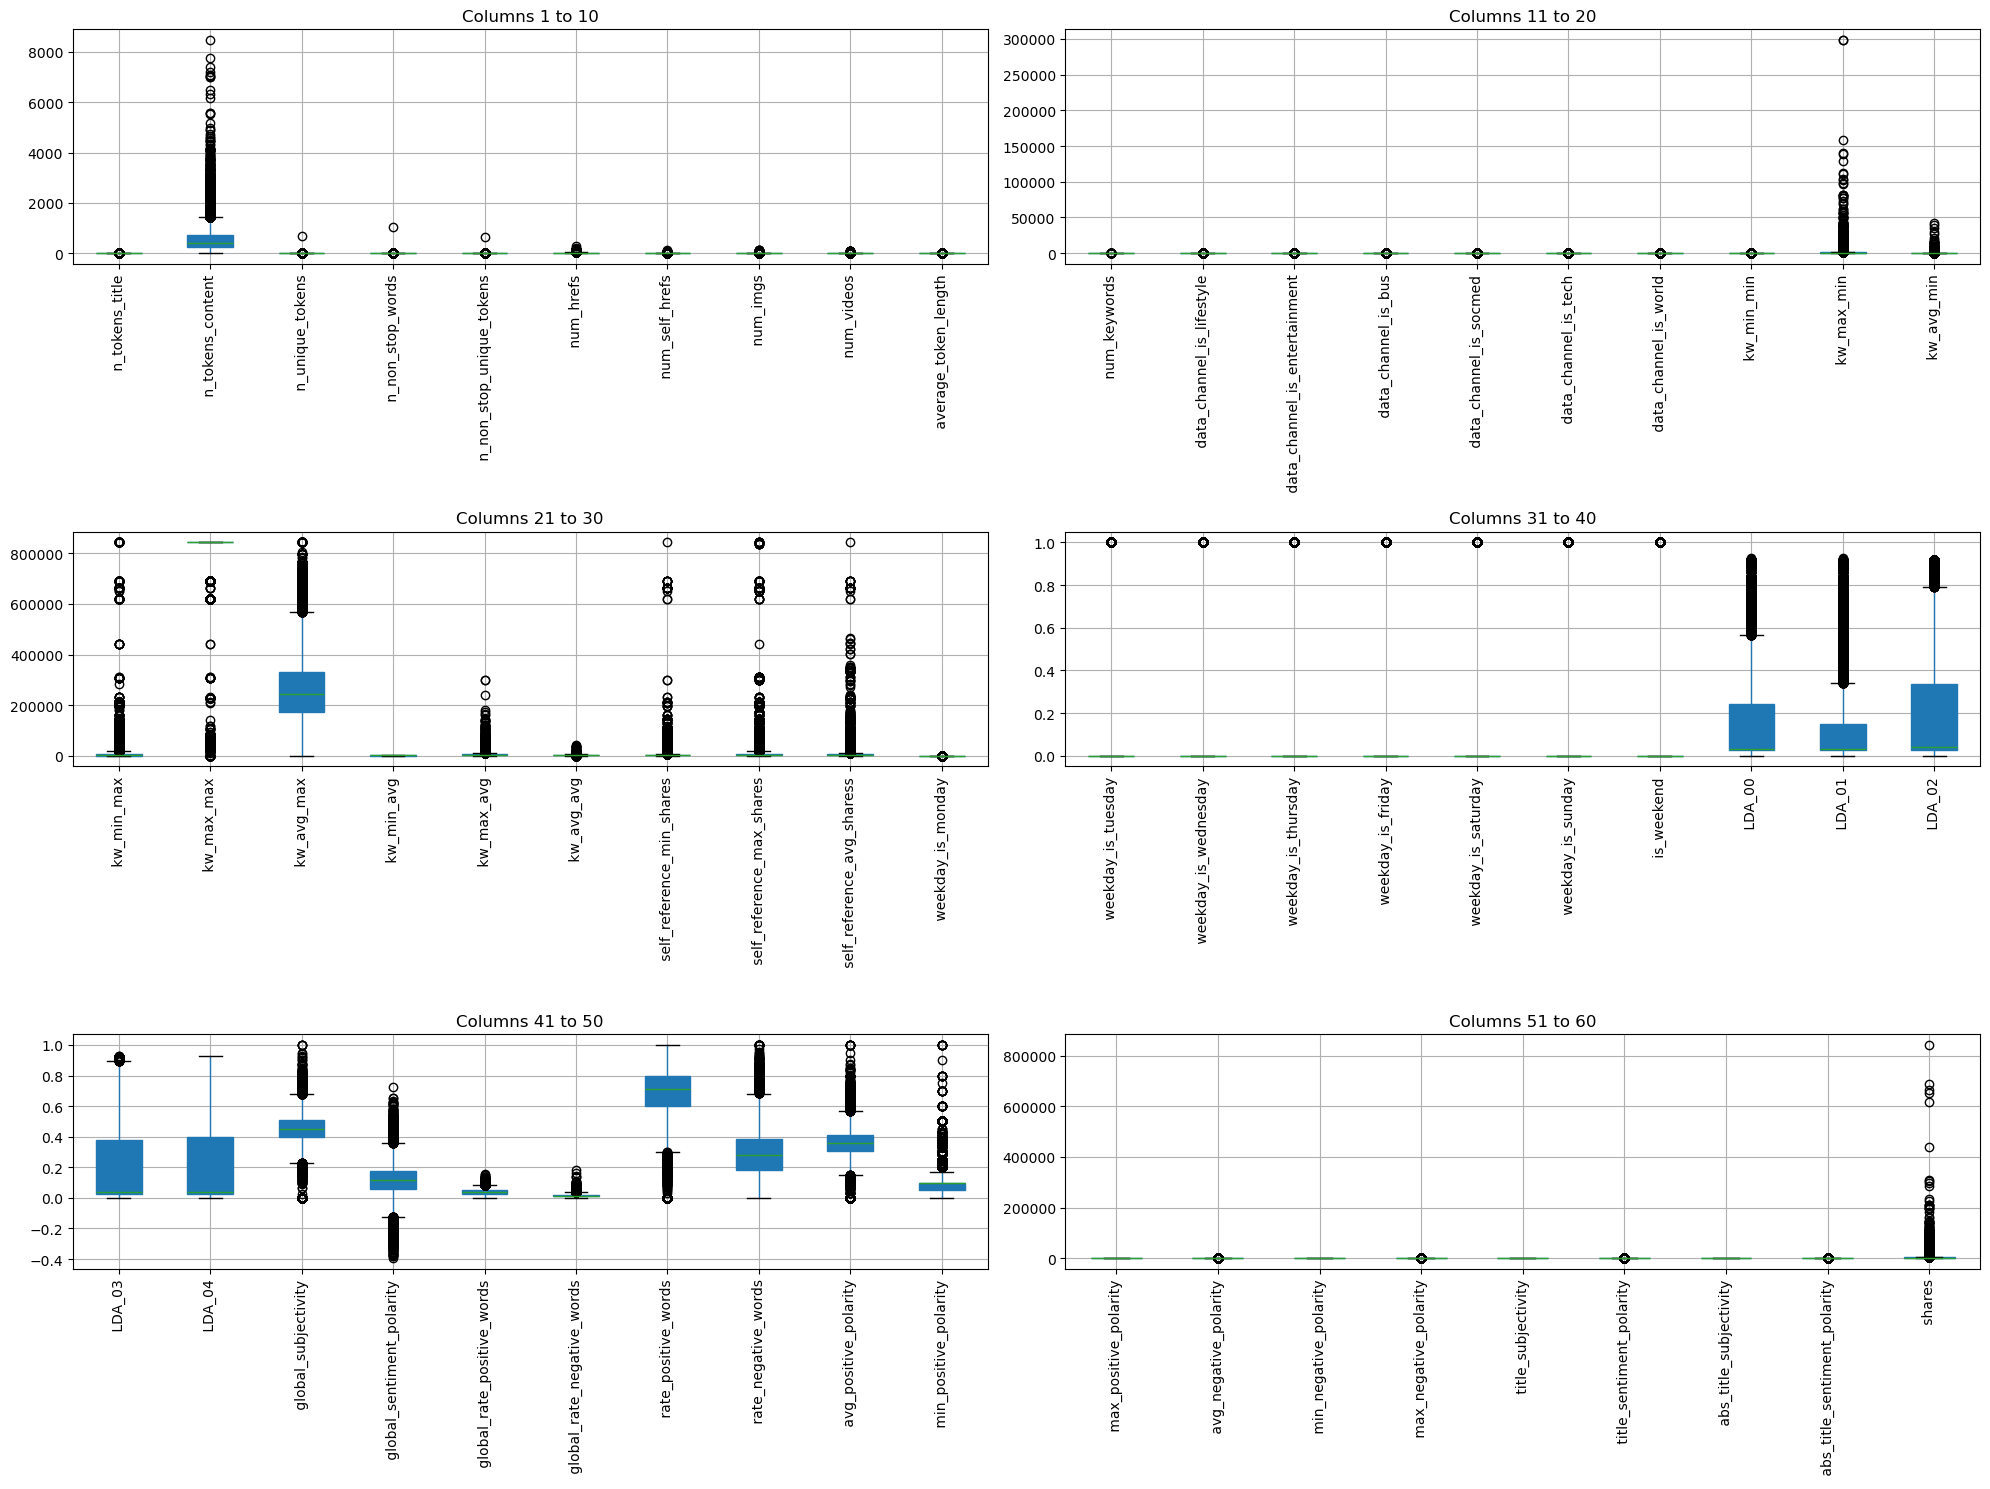

In [34]:
import matplotlib.pyplot as plt
import numpy as np  # Ensure numpy is imported

# Create a figure with 6 subplots (3 rows, 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Define custom colors for box plots
colors = ['lightblue', 'lightgreen', 'lightsalmon', 'lightpink', 'lavender', 
          'gold', 'aquamarine', 'khaki', 'peachpuff', 'turquoise']

# Iterate through the columns in batches of 10
for idx, i in enumerate(range(0, 59, 10)):
    # Select the current batch of columns
    batch = data.iloc[:, i:i+10]
    
    # Create box plots for the current batch
    batch.boxplot(ax=axes[idx], patch_artist=True)  # Use patch_artist=True for coloring

    # Apply colors to the boxes using the patches
    for patch, color in zip(axes[idx].artists, colors[:len(batch.columns)]):
        patch.set_facecolor(color)

    # Set the title for each subplot
    axes[idx].set_title(f"Columns {i+1} to {i+10}")
    axes[idx].tick_params(axis='x', rotation=90)  # Rotate labels for readability

# Adjust layout for neatness
plt.tight_layout()
plt.show()


### a) Mean and Standard Deviation Method 

In [36]:

# Set the threshold for outliers (e.g., 3 standard deviations)
threshold = 4


# Create a copy of the dataset to work with
data_cleaned = data.copy()

# Apply outlier removal to all numeric columns, including the target column
for column in data_cleaned.columns:  # Iterate through all columns
    mean = data_cleaned[column].mean()
    std_dev = data_cleaned[column].std()

    # Calculate bounds
    lower_bound = mean - (threshold * std_dev)
    upper_bound = mean + (threshold * std_dev)

    # Filter rows within bounds
    data_cleaned = data_cleaned[(data_cleaned[column] >= lower_bound) & (data_cleaned[column] <= upper_bound)]

# Check the cleaned dataset
print("Shape of dataset after outlier removal:", data_cleaned.shape)


Shape of dataset after outlier removal: (30417, 59)


In [37]:
data.shape

(39644, 59)

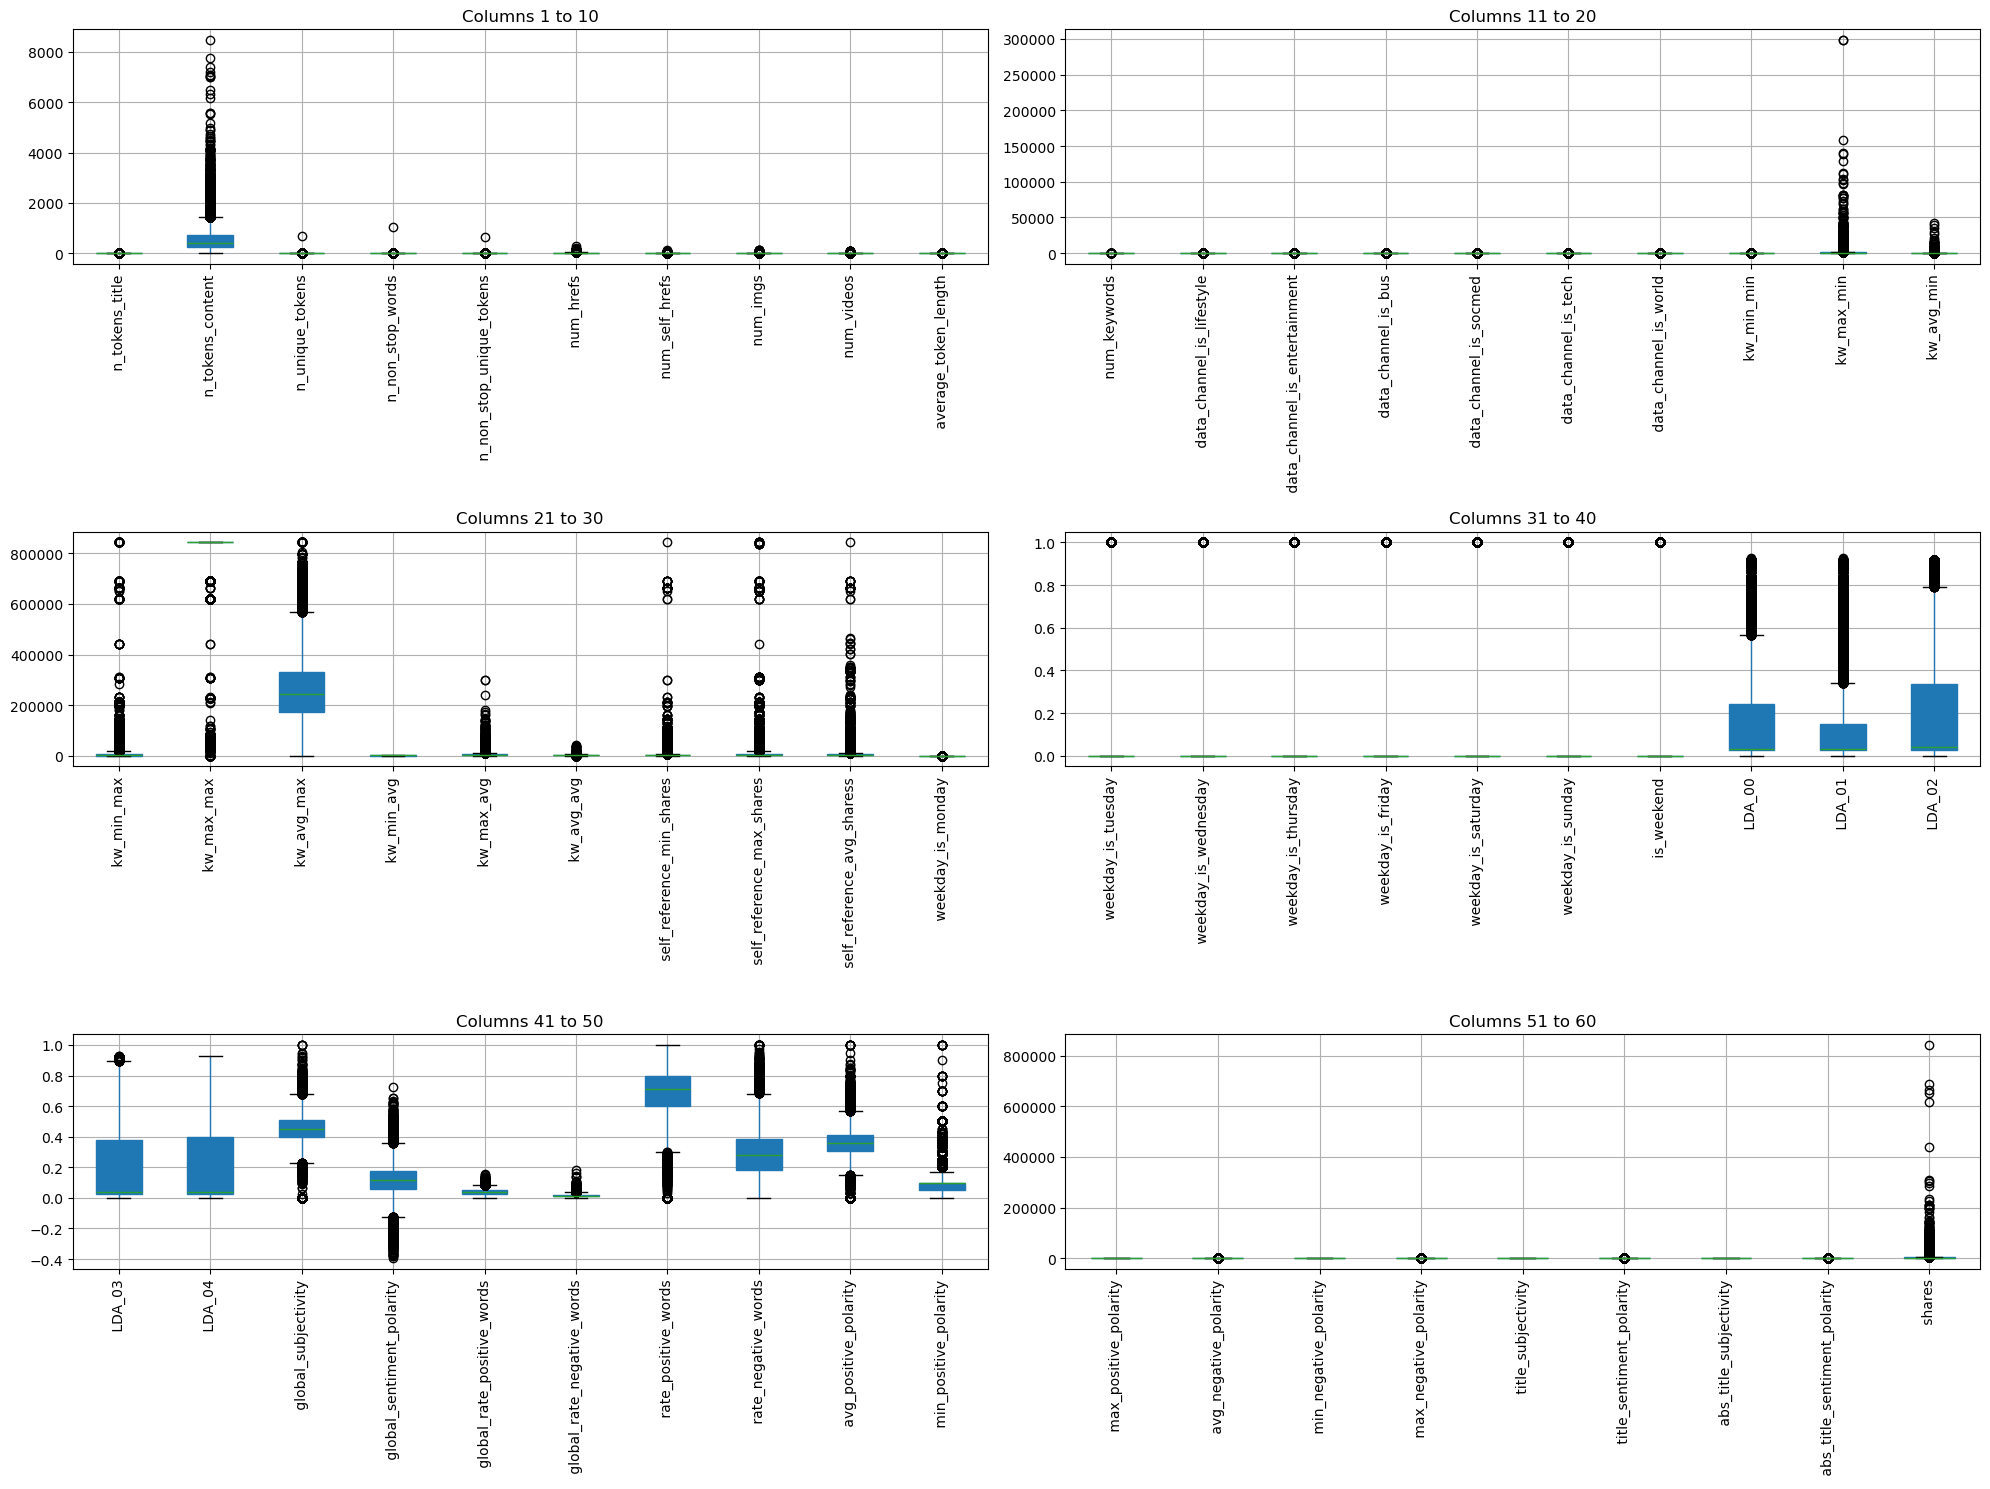

In [38]:
import matplotlib.pyplot as plt
import numpy as np  # Ensure numpy is imported

# Create a figure with 6 subplots (3 rows, 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Define custom colors for box plots
colors = ['lightblue', 'lightgreen', 'lightsalmon', 'lightpink', 'lavender', 
          'gold', 'aquamarine', 'khaki', 'peachpuff', 'turquoise']

# Iterate through the columns in batches of 10
for idx, i in enumerate(range(0, 59, 10)):
    # Select the current batch of columns
    batch = data.iloc[:, i:i+10]
    
    # Create box plots for the current batch
    batch.boxplot(ax=axes[idx], patch_artist=True)  # Use patch_artist=True for coloring

    # Apply colors to the boxes using the patches
    for patch, color in zip(axes[idx].artists, colors[:len(batch.columns)]):
        patch.set_facecolor(color)

    # Set the title for each subplot
    axes[idx].set_title(f"Columns {i+1} to {i+10}")
    axes[idx].tick_params(axis='x', rotation=90)  # Rotate labels for readability

# Adjust layout for neatness
plt.tight_layout()
plt.show()


### b)IQR Method 

In [40]:
# Calculate IQR for each column in the cleaned dataset
Q1 = data_cleaned.quantile(0.10)  # First quartile
Q3 = data_cleaned.quantile(0.90)  # Third quartile
IQR = Q3 - Q1                     # Interquartile range

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows within bounds
data_cleaned_iqr = data_cleaned[~((data_cleaned < lower_bound) | (data_cleaned > upper_bound)).any(axis=1)]

# Check the shape after additional outlier removal
print("Shape of dataset after IQR outlier removal:", data_cleaned_iqr.shape)


Shape of dataset after IQR outlier removal: (18901, 59)


I used the IQR method because it removes outliers in a way that works well for skewed data and focuses on the middle range of values. It's better at handling extreme values than other methods, helping to clean the data without losing too much useful information.

In [42]:
data_1=data.copy()

In [43]:
data.shape


(39644, 59)

In [44]:
data_1.shape

(39644, 59)

**IQR dierect to data**

In [46]:
# Calculate IQR for each column
Q1 = data_1.quantile(0.10)  # First quartile
Q3 = data_1.quantile(0.90)  # Third quartile
IQR = Q3 - Q1               # Interquartile range

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data within bounds
data_1_cleaned_iqr = data_1[~((data_1 < lower_bound) | (data_1 > upper_bound)).any(axis=1)]

# Check the shape of the cleaned dataset
print("Shape of dataset after applying IQR:", data_cleaned_iqr.shape)


Shape of dataset after applying IQR: (18901, 59)


**Applying the IQR method directly to the original data does seem to have removed a substantial portion of  dataset, which might not be ideal if preserving more data is crucial. Combining the Mean and Standard Deviation method with capping outliers is a great next step as it allows to retain rows while addressing extreme values.**

### Winsorization Method

In [49]:
# Winsorize data_cleaned at the 5th and 95th percentiles
data_winsorized = data_cleaned.clip(lower=data_cleaned.quantile(0.05), upper=data_cleaned.quantile(0.95), axis=1)

# Check the shape of the Winsorized dataset
print("Shape of dataset after Winsorization:", data_winsorized.shape)


Shape of dataset after Winsorization: (30417, 59)


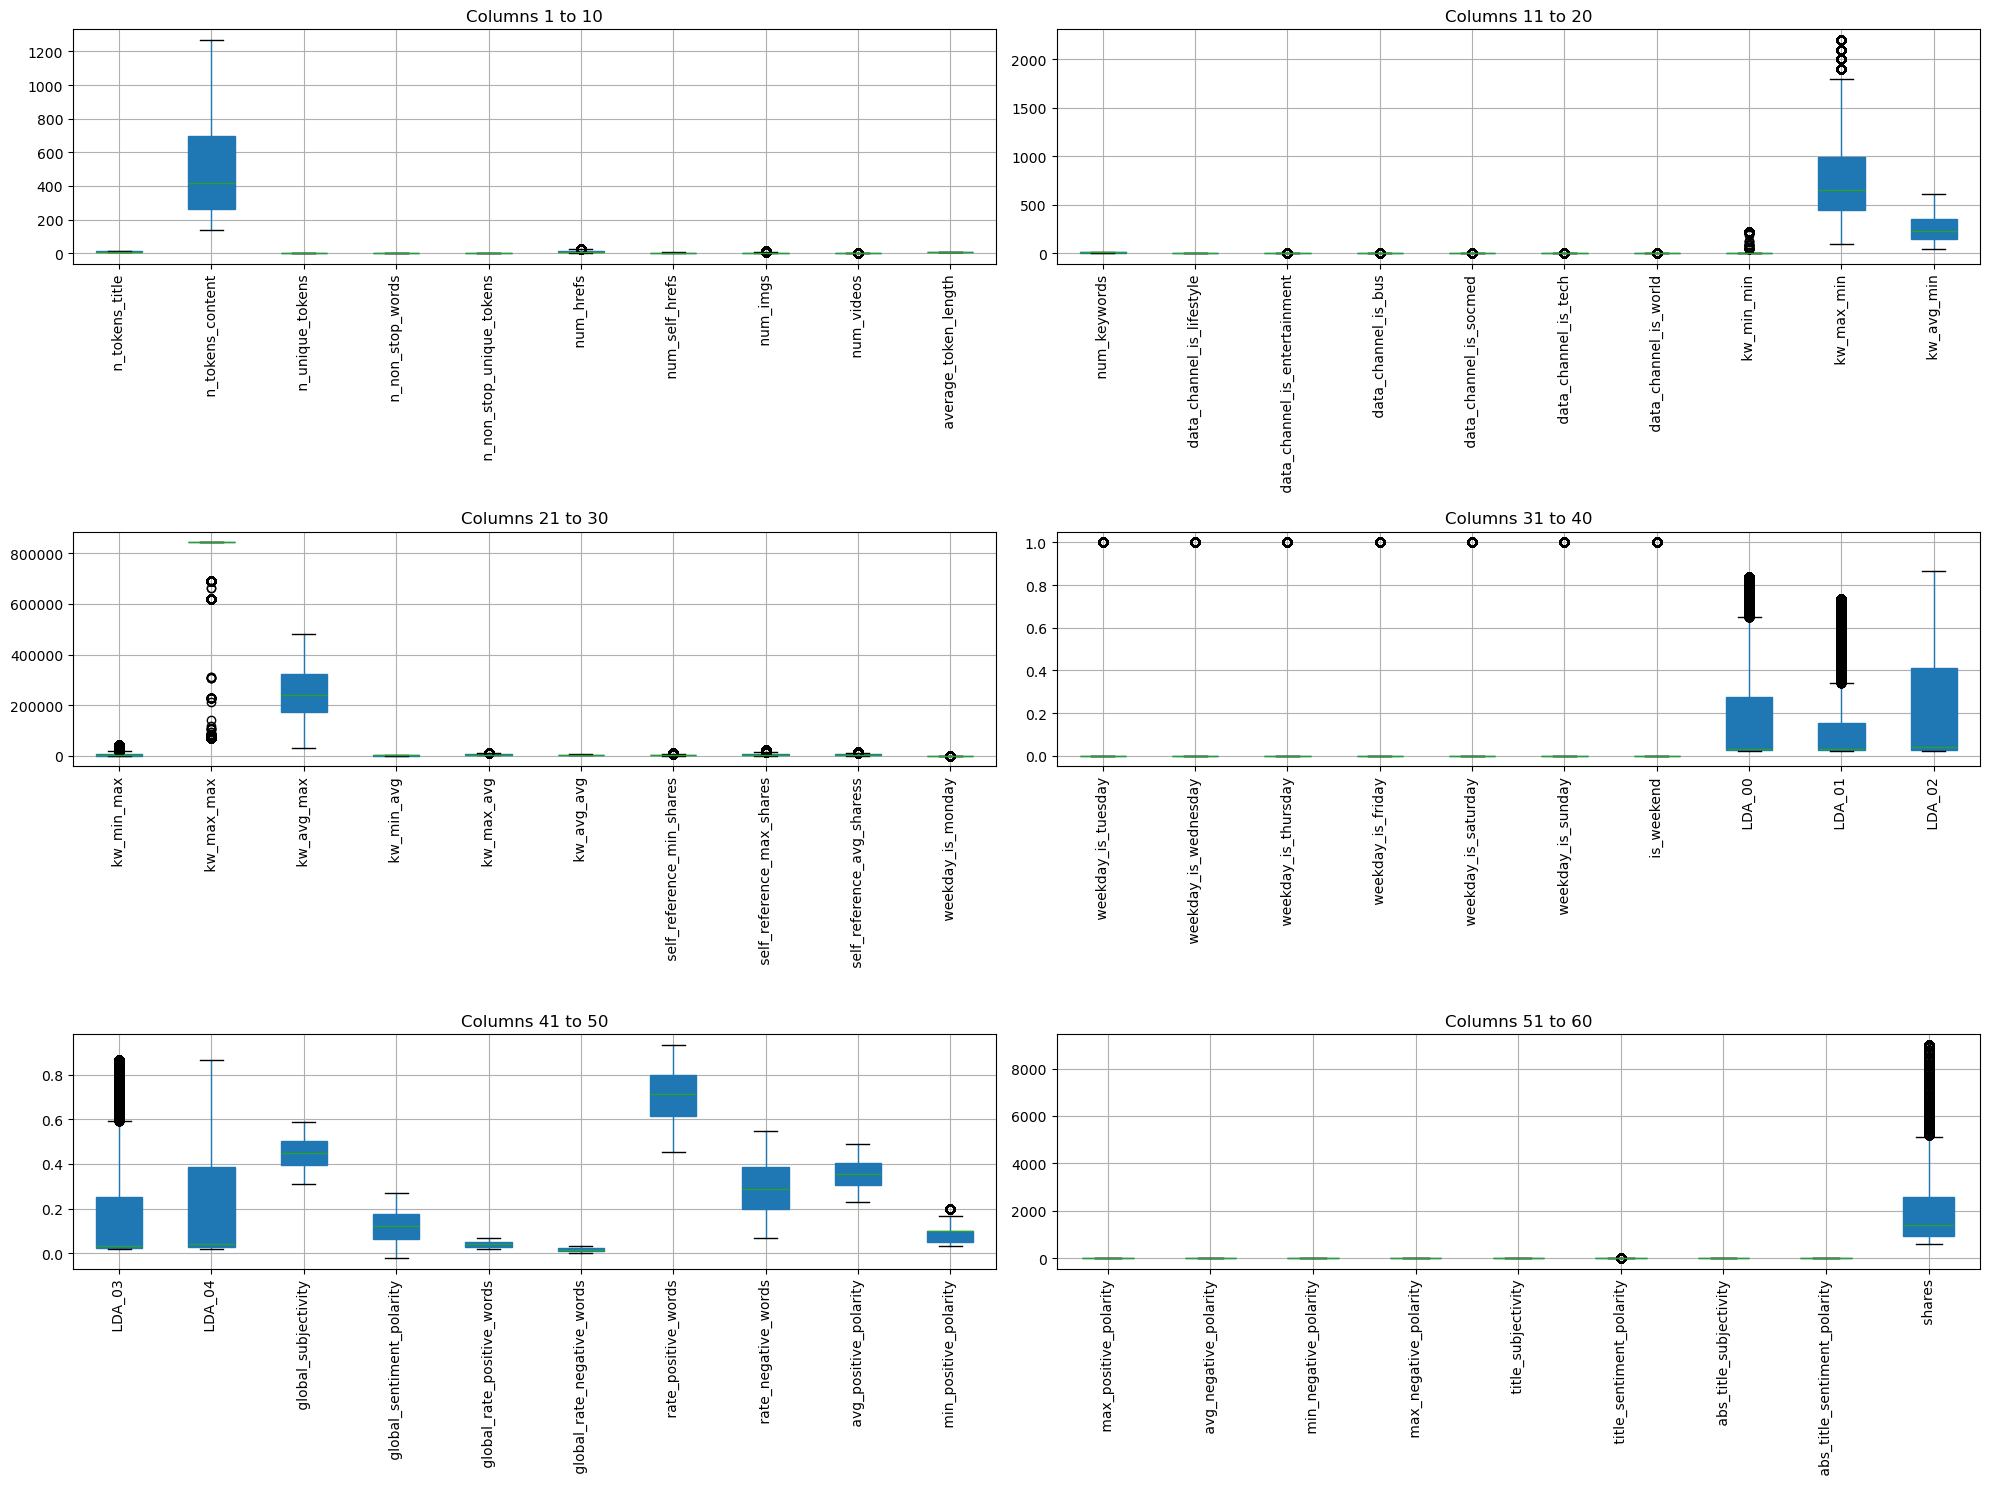

In [50]:
import matplotlib.pyplot as plt

# Define custom colors for box plots
colors = ['lightblue', 'lightgreen', 'lightsalmon', 'lightpink', 'lavender', 
          'gold', 'aquamarine', 'khaki', 'peachpuff', 'turquoise']

# Create subplots for visualizing columns in batches (e.g., 10 columns per subplot)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))  # Adjust rows/cols as needed
axes = axes.flatten()  # Flatten axes array for easier indexing

# Plot box plots in batches of 10 columns
for idx, i in enumerate(range(0, len(data_winsorized.columns), 10)):
    # Select batch of 10 columns
    batch = data_winsorized.iloc[:, i:i+10]  
    
    # Create box plot for the batch
    batch.boxplot(ax=axes[idx], patch_artist=True)  # Use patch_artist=True to enable coloring

    # Apply custom colors to the boxes
    for patch, color in zip(axes[idx].artists, colors[:len(batch.columns)]):
        patch.set_facecolor(color)

    # Set subplot title and rotate x-axis labels
    axes[idx].set_title(f"Columns {i+1} to {i+10}")
    axes[idx].tick_params(axis='x', rotation=90)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [51]:
# Rename data_winsorized to a new name
new_data = data_winsorized


In [52]:
new_data.shape

(30417, 59)

In [53]:
new_data.skew().sort_values(ascending=True)

kw_max_max                      -2.646511
abs_title_subjectivity          -0.628815
max_negative_polarity           -0.506664
min_negative_polarity           -0.276204
avg_negative_polarity           -0.236835
rate_positive_words             -0.180630
max_positive_polarity           -0.143006
global_subjectivity             -0.022513
data_channel_is_lifestyle        0.000000
n_non_stop_words                 0.000000
num_keywords                     0.012051
global_sentiment_polarity        0.049268
avg_positive_polarity            0.067843
n_tokens_title                   0.070337
n_non_stop_unique_tokens         0.071570
average_token_length             0.097291
kw_avg_max                       0.130770
n_unique_tokens                  0.165166
rate_negative_words              0.180630
global_rate_positive_words       0.260607
global_rate_negative_words       0.419364
kw_min_avg                       0.432445
min_positive_polarity            0.635291
kw_avg_min                       0

**Applying Yeo-Johnson Transformation**

In [55]:
from sklearn.preprocessing import PowerTransformer

# Initialize the Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson')

# Apply the transformation to the 'kw_max_max' column
new_data['kw_max_max_transformed'] = pt.fit_transform(new_data[[' kw_max_max']])

# Verify the skewness after the transformation
new_skewness = new_data['kw_max_max_transformed'].skew()
print("Skewness after Yeo-Johnson transformation:", new_skewness)


Skewness after Yeo-Johnson transformation: -1.6367058430669401


In [56]:
#Remove the Original Column kw_max_max
new_data.drop(columns=[' kw_max_max'], inplace=True)


Applying the square root transformation to  positively skewed columns is a smart choice, as it effectively reduces moderate positive skewness by compressing higher values while maintaining the relationship between data points. Here's how you can implement the transformation:


**Square Root Transformation**

In [59]:
positive_skew_columns = [ ' num_hrefs', ' LDA_02', ' abs_title_sentiment_polarity', ' data_channel_is_world', 
' LDA_04', ' kw_max_avg', ' kw_max_min', ' data_channel_is_tech', ' LDA_00', 
' LDA_03', ' weekday_is_wednesday', ' weekday_is_tuesday', ' self_reference_avg_sharess',
' weekday_is_thursday', ' self_reference_max_shares', ' data_channel_is_bus',
' data_channel_is_entertainment', ' num_videos', ' num_imgs', ' weekday_is_monday', 
' LDA_01', ' self_reference_min_shares', ' shares', ' weekday_is_friday', ' kw_min_max', 
' is_weekend', ' kw_min_min', ' weekday_is_sunday', ' weekday_is_saturday', 
' data_channel_is_socmed'
]

# Apply square root transformation to each column
for column in positive_skew_columns:
    # Ensure all values are positive to avoid errors (shift if necessary)
    if (new_data[column] < 0).any():
        new_data[column] = new_data[column] - new_data[column].min() + 1
    new_data[column] = np.sqrt(new_data[column])


In [60]:
new_data.skew().sort_values(ascending=True)

kw_max_max_transformed           -1.636706
 abs_title_subjectivity          -0.628815
 max_negative_polarity           -0.506664
 min_negative_polarity           -0.276204
 avg_negative_polarity           -0.236835
 rate_positive_words             -0.180630
 max_positive_polarity           -0.143006
 global_subjectivity             -0.022513
 n_non_stop_words                 0.000000
 data_channel_is_lifestyle        0.000000
 num_keywords                     0.012051
 global_sentiment_polarity        0.049268
 avg_positive_polarity            0.067843
 n_tokens_title                   0.070337
 n_non_stop_unique_tokens         0.071570
 average_token_length             0.097291
 kw_avg_max                       0.130770
 n_unique_tokens                  0.165166
 rate_negative_words              0.180630
 global_rate_positive_words       0.260607
 self_reference_avg_sharess       0.381516
 global_rate_negative_words       0.419364
 kw_min_avg                       0.432445
 kw_max_min

**For Columns with Strong Positive Skew: Apply a logarithmic transformation:**

In [62]:

# List of strongly positively skewed columns
columns_to_transform = [
    ' weekday_is_monday', ' weekday_is_friday', ' is_weekend', ' kw_min_min', 
    ' weekday_is_sunday', ' weekday_is_saturday', ' data_channel_is_socmed'
]

# Apply log1p transformation to each column (handles zero values safely)
for column in columns_to_transform:
    new_data[column] = np.log1p(new_data[column])

# Verify the skewness after transformation
for column in columns_to_transform:
    skewness = new_data[column].skew()
    print(f"Skewness of {column} after log transformation: {skewness}")


Skewness of  weekday_is_monday after log transformation: 1.770490704719703
Skewness of  weekday_is_friday after log transformation: 2.0277100229925127
Skewness of  is_weekend after log transformation: 2.2652313622104603
Skewness of  kw_min_min after log transformation: 1.7910738001083695
Skewness of  weekday_is_sunday after log transformation: 3.50753871551578
Skewness of  weekday_is_saturday after log transformation: 3.7229515715640598
Skewness of  data_channel_is_socmed after log transformation: 3.732907949729636


In [63]:
# List of high-skewed columns
high_skew_columns = [
    ' weekday_is_monday', ' weekday_is_friday', ' is_weekend', ' kw_min_min',
    ' weekday_is_sunday', ' weekday_is_saturday', ' data_channel_is_socmed'
]

# Loop through each column to get unique values
for column in high_skew_columns:
    unique_values = new_data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")


Unique values in column ' weekday_is_monday': [0.69314718 0.        ]
Unique values in column ' weekday_is_friday': [0.         0.69314718]
Unique values in column ' is_weekend': [0.         0.69314718]
Unique values in column ' kw_min_min': [0.88137359 2.7599244  1.23822632 2.52136097 2.47340581 2.39789527
 2.07944154 2.20411829 2.0612336  2.31896534 2.16115352 2.6836333
 2.02253231 0.69314718 2.21761013 2.33996098 2.03251365 2.72443568
 2.35012047]
Unique values in column ' weekday_is_sunday': [0.         0.69314718]
Unique values in column ' weekday_is_saturday': [0.         0.69314718]
Unique values in column ' data_channel_is_socmed': [0.         0.69314718]


These columns are binary or numerical features, some with high skewness, which may need transformations depending on their relevance to the target variable.

# **DATA** **VISUALIZATION**
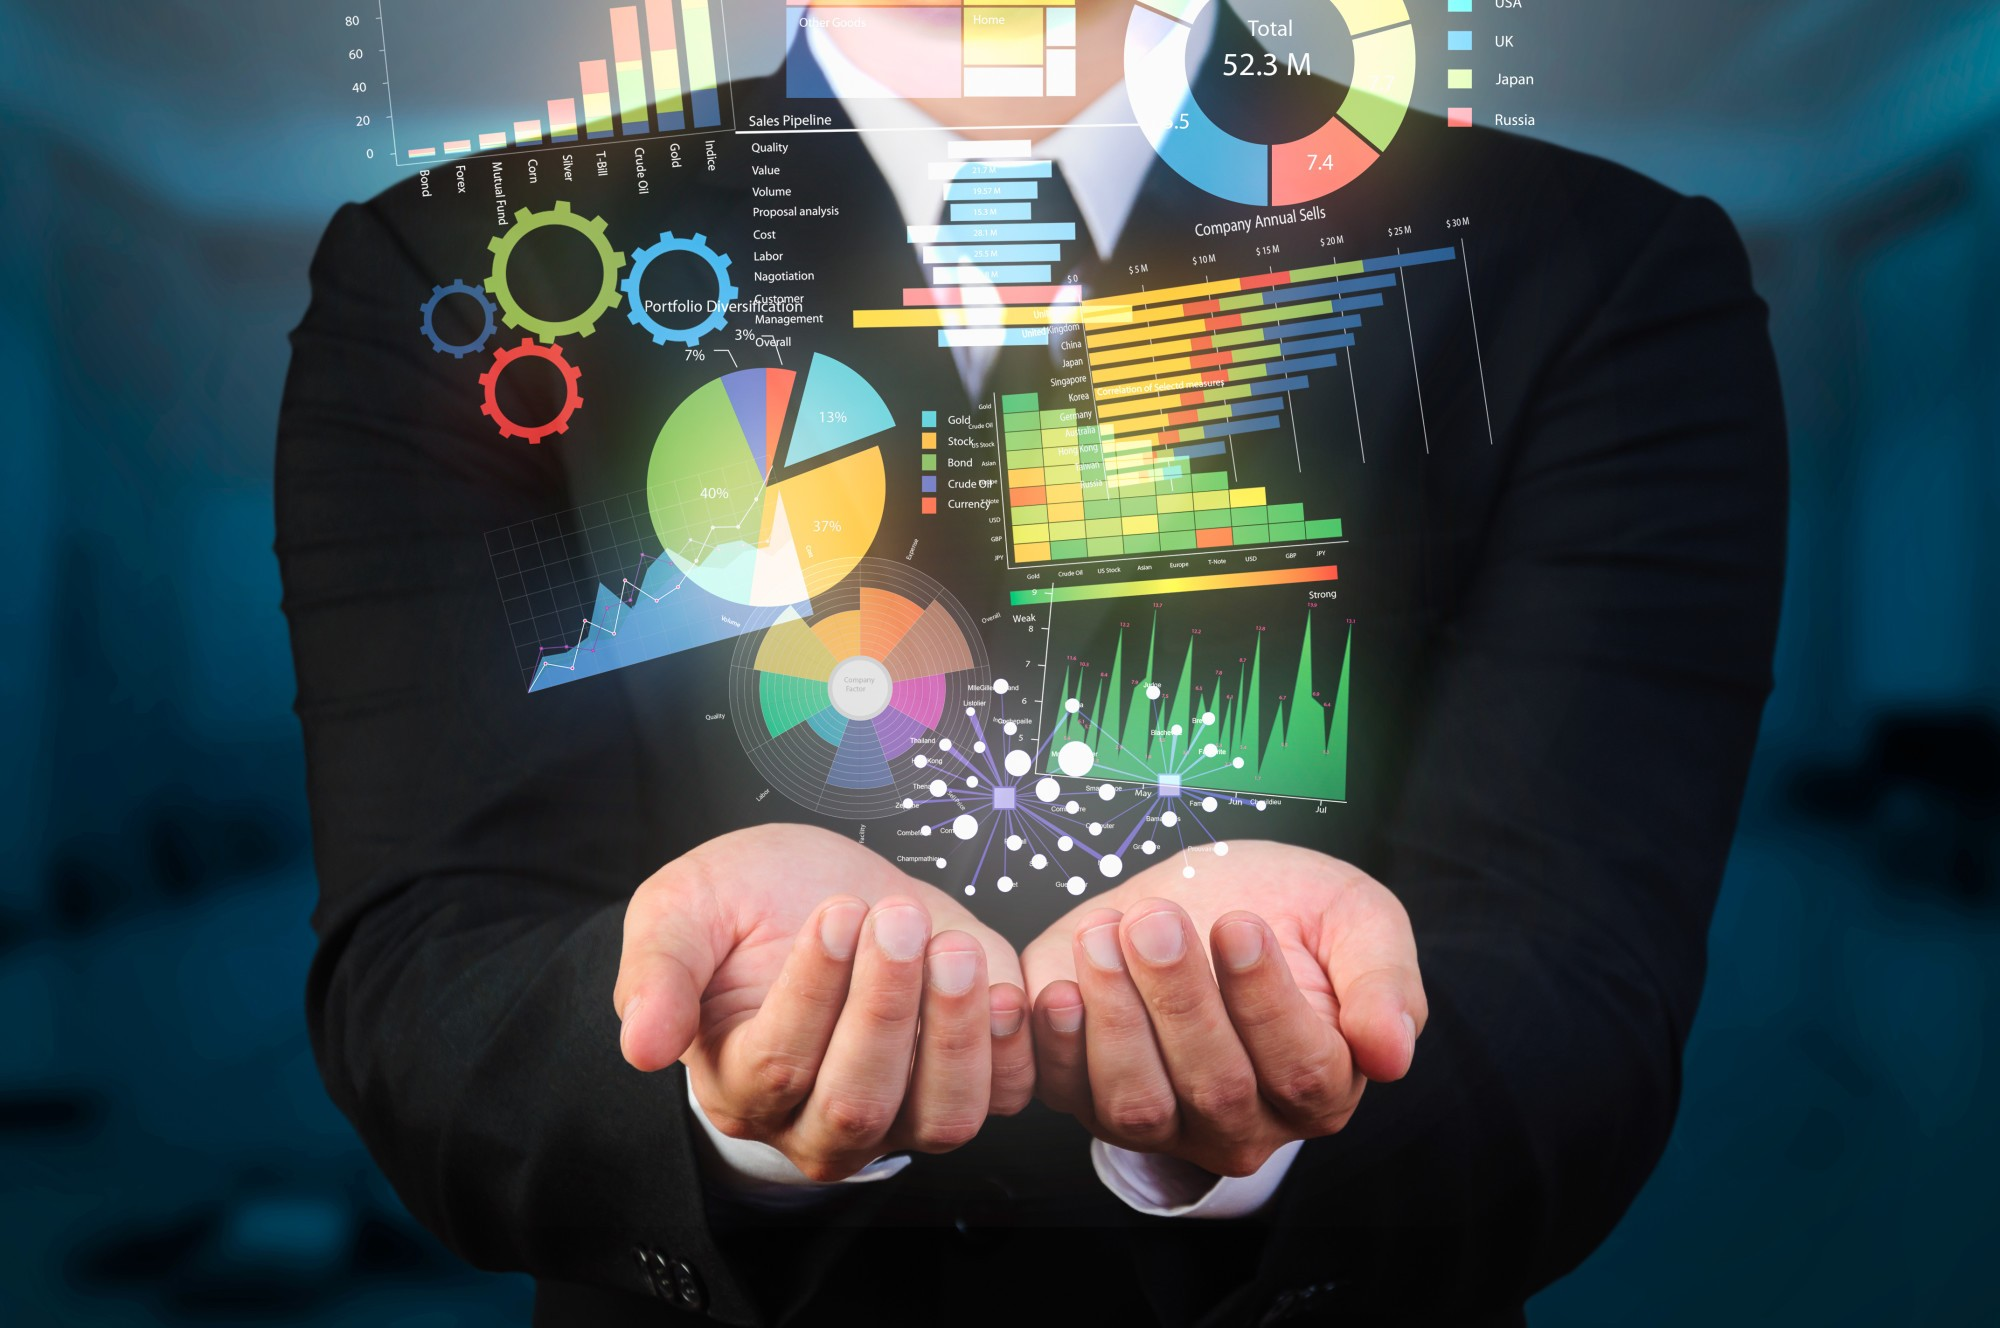

# Univariate

### 1. Histogram for Target Variable (shares )

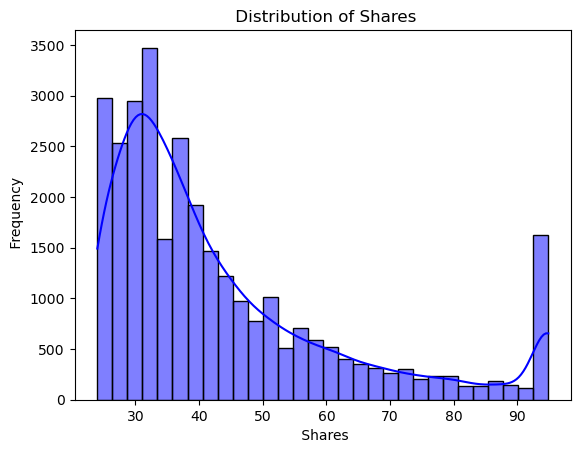

In [68]:
sns.histplot(new_data[' shares'], kde=True, color='blue', bins=30)
plt.title(' Distribution of Shares')
plt.xlabel(' Shares')
plt.ylabel(' Frequency')
plt.show()


**Explanation: This shows the frequency distribution of , helping identify its skewness and outliers.This pattern showcases a positive skew in the data, where most articles cluster around lower share counts, with fewer articles achieving high shares**


## 2. Boxplot for 

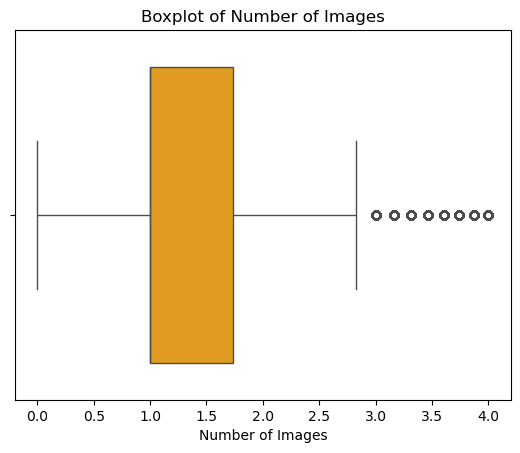

In [71]:
sns.boxplot(data=new_data, x=' num_imgs', color='orange')
plt.title('Boxplot of Number of Images')
plt.xlabel('Number of Images')
plt.show()


**Explanation: Highlights the presence of outliers in the number of images associated with the articles. shows "some outliers," it suggests that while most articles have a consistent range of images, there are a few articles where the number of images stands far apart from the typical range (above the upper whisker or below the lower whisker). These outliers could represent unique cases, such as articles that rely heavily on visual content or minimal visuals, which may influence their popularity and engagement.**

### 3. Density Plot for Sentiment Polarity (global_sentiment_polarity)

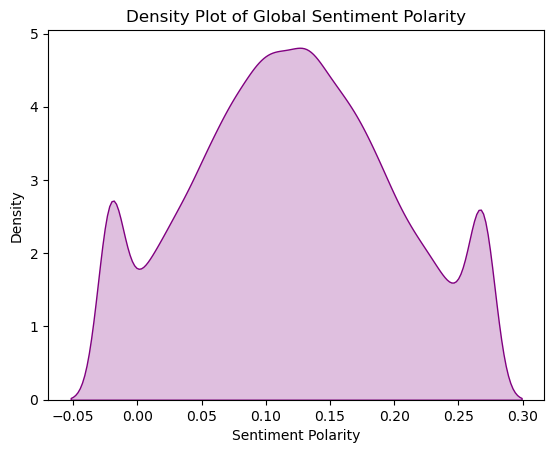

In [74]:
sns.kdeplot(new_data[' global_sentiment_polarity'], shade=True, color='purple')
plt.title('Density Plot of Global Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Density')
plt.show()


**Explanation: Visualizes the density and distribution of sentiment polarity across the articles.The majority of articles maintain a balanced or moderately positive tone.**

### 4. Bar Plot for 

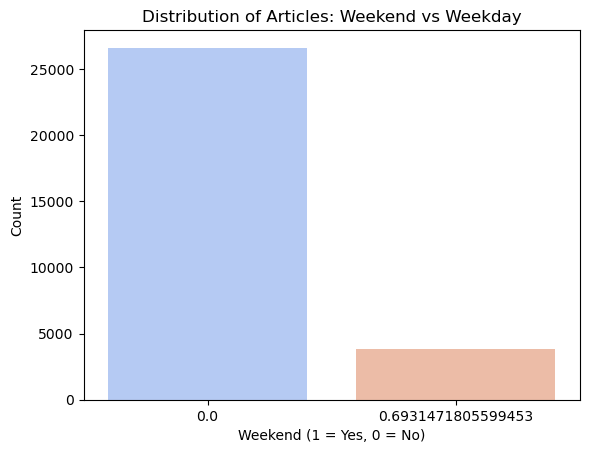

In [77]:
sns.barplot(x=new_data[' is_weekend'].value_counts().index, 
            y=new_data[' is_weekend'].value_counts().values, 
            palette='coolwarm')
plt.title('Distribution of Articles: Weekend vs Weekday')
plt.xlabel('Weekend (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


**Explanation: Displays the distribution of articles published on weekdays versus weekends.This imbalance suggests that weekday publications are prioritized, possibly due to higher audience engagement during workdays. Weekend articles might cater to a smaller but specific audience. Such trends can provide valuable insights for editorial strategies or predicting engagement based on publishing times.**


### 5. Line Chart

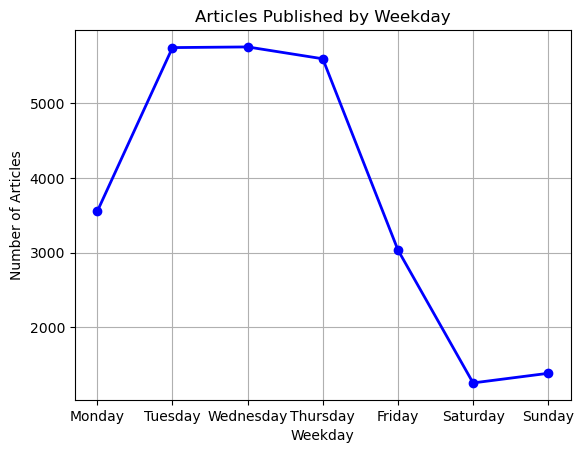

In [80]:
# Data for the line chart
x_line = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
y_line = [
    new_data[' weekday_is_monday'].sum(),
    new_data[' weekday_is_tuesday'].sum(),
    new_data[' weekday_is_wednesday'].sum(),
    new_data[' weekday_is_thursday'].sum(),
    new_data[' weekday_is_friday'].sum(),
    new_data[' weekday_is_saturday'].sum(),
    new_data[' weekday_is_sunday'].sum()
]

# Plot the line chart
import matplotlib.pyplot as plt

plt.plot(x_line, y_line, marker='o', color='blue', linewidth=2)
plt.title('Articles Published by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


**Explanation: Tracks trends over a sequential variable, such as shares across weekdays. It could be valuable to explore why midweek sees such peaks—perhaps audience behavior, workday dynamics, or editorial strategies play a role.**

### 6. Scatter Plot

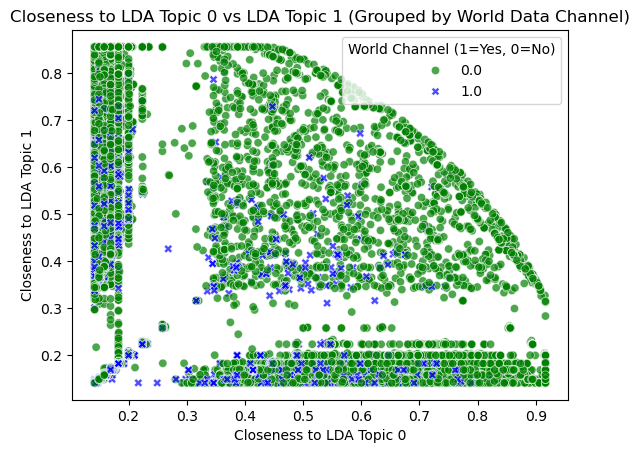

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with labeled colors (yellow, blue, red) based on data_channel_is_world
sns.scatterplot(
    data=new_data, 
    x=' LDA_00', 
    y=' LDA_01', 
    hue=' data_channel_is_world', 
    style=' data_channel_is_world', 
    palette={0: 'green', 1: 'blue'},  # Assign colors explicitly
    alpha=0.7
)

# Adding labels and title
plt.title('Closeness to LDA Topic 0 vs LDA Topic 1 (Grouped by World Data Channel)')
plt.xlabel('Closeness to LDA Topic 0')
plt.ylabel('Closeness to LDA Topic 1')
plt.legend(title='World Channel (1=Yes, 0=No)', loc='best')

# Show plot
plt.show()


**Explanation:The scatter plot illustrates that articles under the "yes" category for  exhibit a broader spread across closeness to LDA topics, indicating greater variability in their characteristics. In contrast, articles labeled as "no" are more tightly clustered, suggesting consistency or a narrower range in topic closeness. This could point to the "World" channel covering diverse themes, while other channels might focus on more specific or uniform content.**


### 7.Pie Plot 

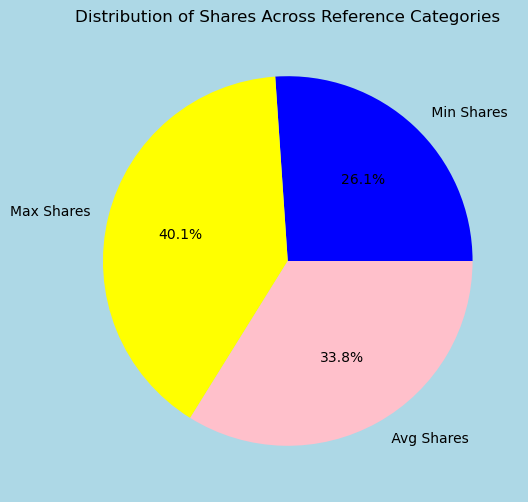

In [86]:
import matplotlib.pyplot as plt

# Data: Average values for the three categories
categories = [' Min Shares', 'Max Shares', ' Avg Shares']
values = [
    new_data[' self_reference_min_shares'].mean(), 
    new_data[' self_reference_max_shares'].mean(), 
    new_data[' self_reference_avg_sharess'].mean()
]

# Create a pie chart with custom background color
plt.figure(figsize=(8, 6))
plt.gcf().set_facecolor('#ADD8E6')  # Change background color (light gray-blue)

plt.pie(values, labels=categories, autopct='%1.1f%%', colors=['blue', 'yellow', 'pink'])
plt.title('Distribution of Shares Across Reference Categories', color='black')
plt.show()


**28. self_reference_min_shares:     Min. shares of referenced articles in Mashable
    29. self_reference_max_shares:     Max. shares of referenced articles in Mashable
    30. self_reference_avg_sharess:    Avg. shares of referenced articles in Mashable**

**The pie chart will display the proportional distribution of shares across the three categories, helping understand their relative impact.**

### 8.Violin Plot

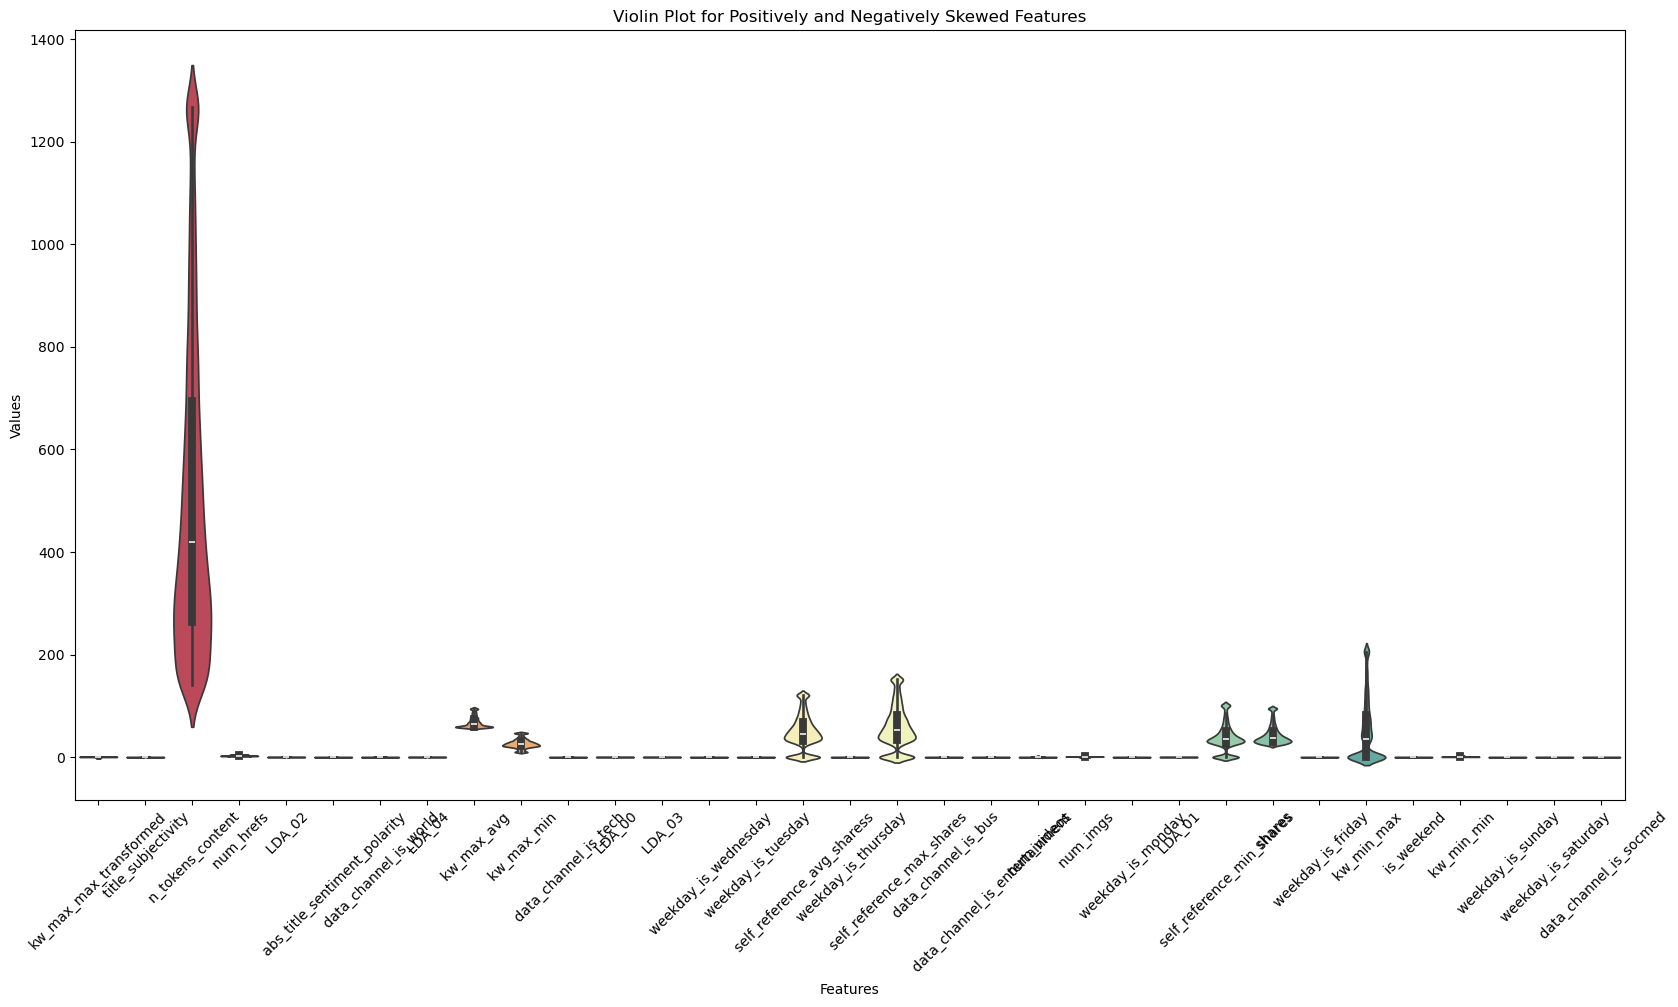

In [90]:

# Select the columns for violin plotting
columns_to_plot = [
    'kw_max_max_transformed' , ' title_subjectivity', ' n_tokens_content', ' num_hrefs', ' LDA_02',
    ' abs_title_sentiment_polarity', ' data_channel_is_world', ' LDA_04', ' kw_max_avg', ' kw_max_min',
    ' data_channel_is_tech', ' LDA_00', ' LDA_03', ' weekday_is_wednesday', ' weekday_is_tuesday',
    ' self_reference_avg_sharess', ' weekday_is_thursday', ' self_reference_max_shares', ' data_channel_is_bus',
    ' data_channel_is_entertainment', ' num_videos', ' num_imgs', ' weekday_is_monday', ' LDA_01',
    ' self_reference_min_shares', ' shares', ' weekday_is_friday', ' kw_min_max', ' is_weekend',
    ' kw_min_min', ' weekday_is_sunday', ' weekday_is_saturday', ' data_channel_is_socmed'
]

# Filter dataset for the selected columns
filtered_data = new_data[columns_to_plot].melt(var_name="Variable", value_name="Value")

# Create the violin plot
plt.figure(figsize=(20, 10))  # Adjust figure size for clarity
sns.violinplot(data=filtered_data, x="Variable", y="Value", palette="Spectral")

# Add title and labels
plt.title('Violin Plot for Positively and Negatively Skewed Features')
plt.xlabel('Features')
plt.ylabel('Values')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


**The three columns—, , and —are highly positively skewed but remain concentrated around the zero line. This happens because their values are sparsely distributed and largely binary or categorical, likely containing zeros for most observations with occasional non-zero values. Positive skewness appears when non-zero values are present but in a limited range, causing the data to cluster near zero and the violin plot to lack a proper distribution shape. This behavior highlights how the nature of the data (e.g., binary or restricted values) can override typical skewness characteristics in visualization.**
**The column  carries significant outliers, with values mostly concentrated around 200 and above, leading to its negative skewness. These outliers disrupt the overall distribution, making the data unevenly spread. On the other hand, positively skewed columns like  and  show consistent distributions entirely above the zero line, reflecting predominantly positive values. Meanwhile, highly skewed columns such as , , and  cluster tightly near the zero line, showing minimal spread and lacking the typical violin shape. This behavior highlights how outliers and concentrated values can affect skewness and the visual representation of distributions.**

### 9. Heatmap

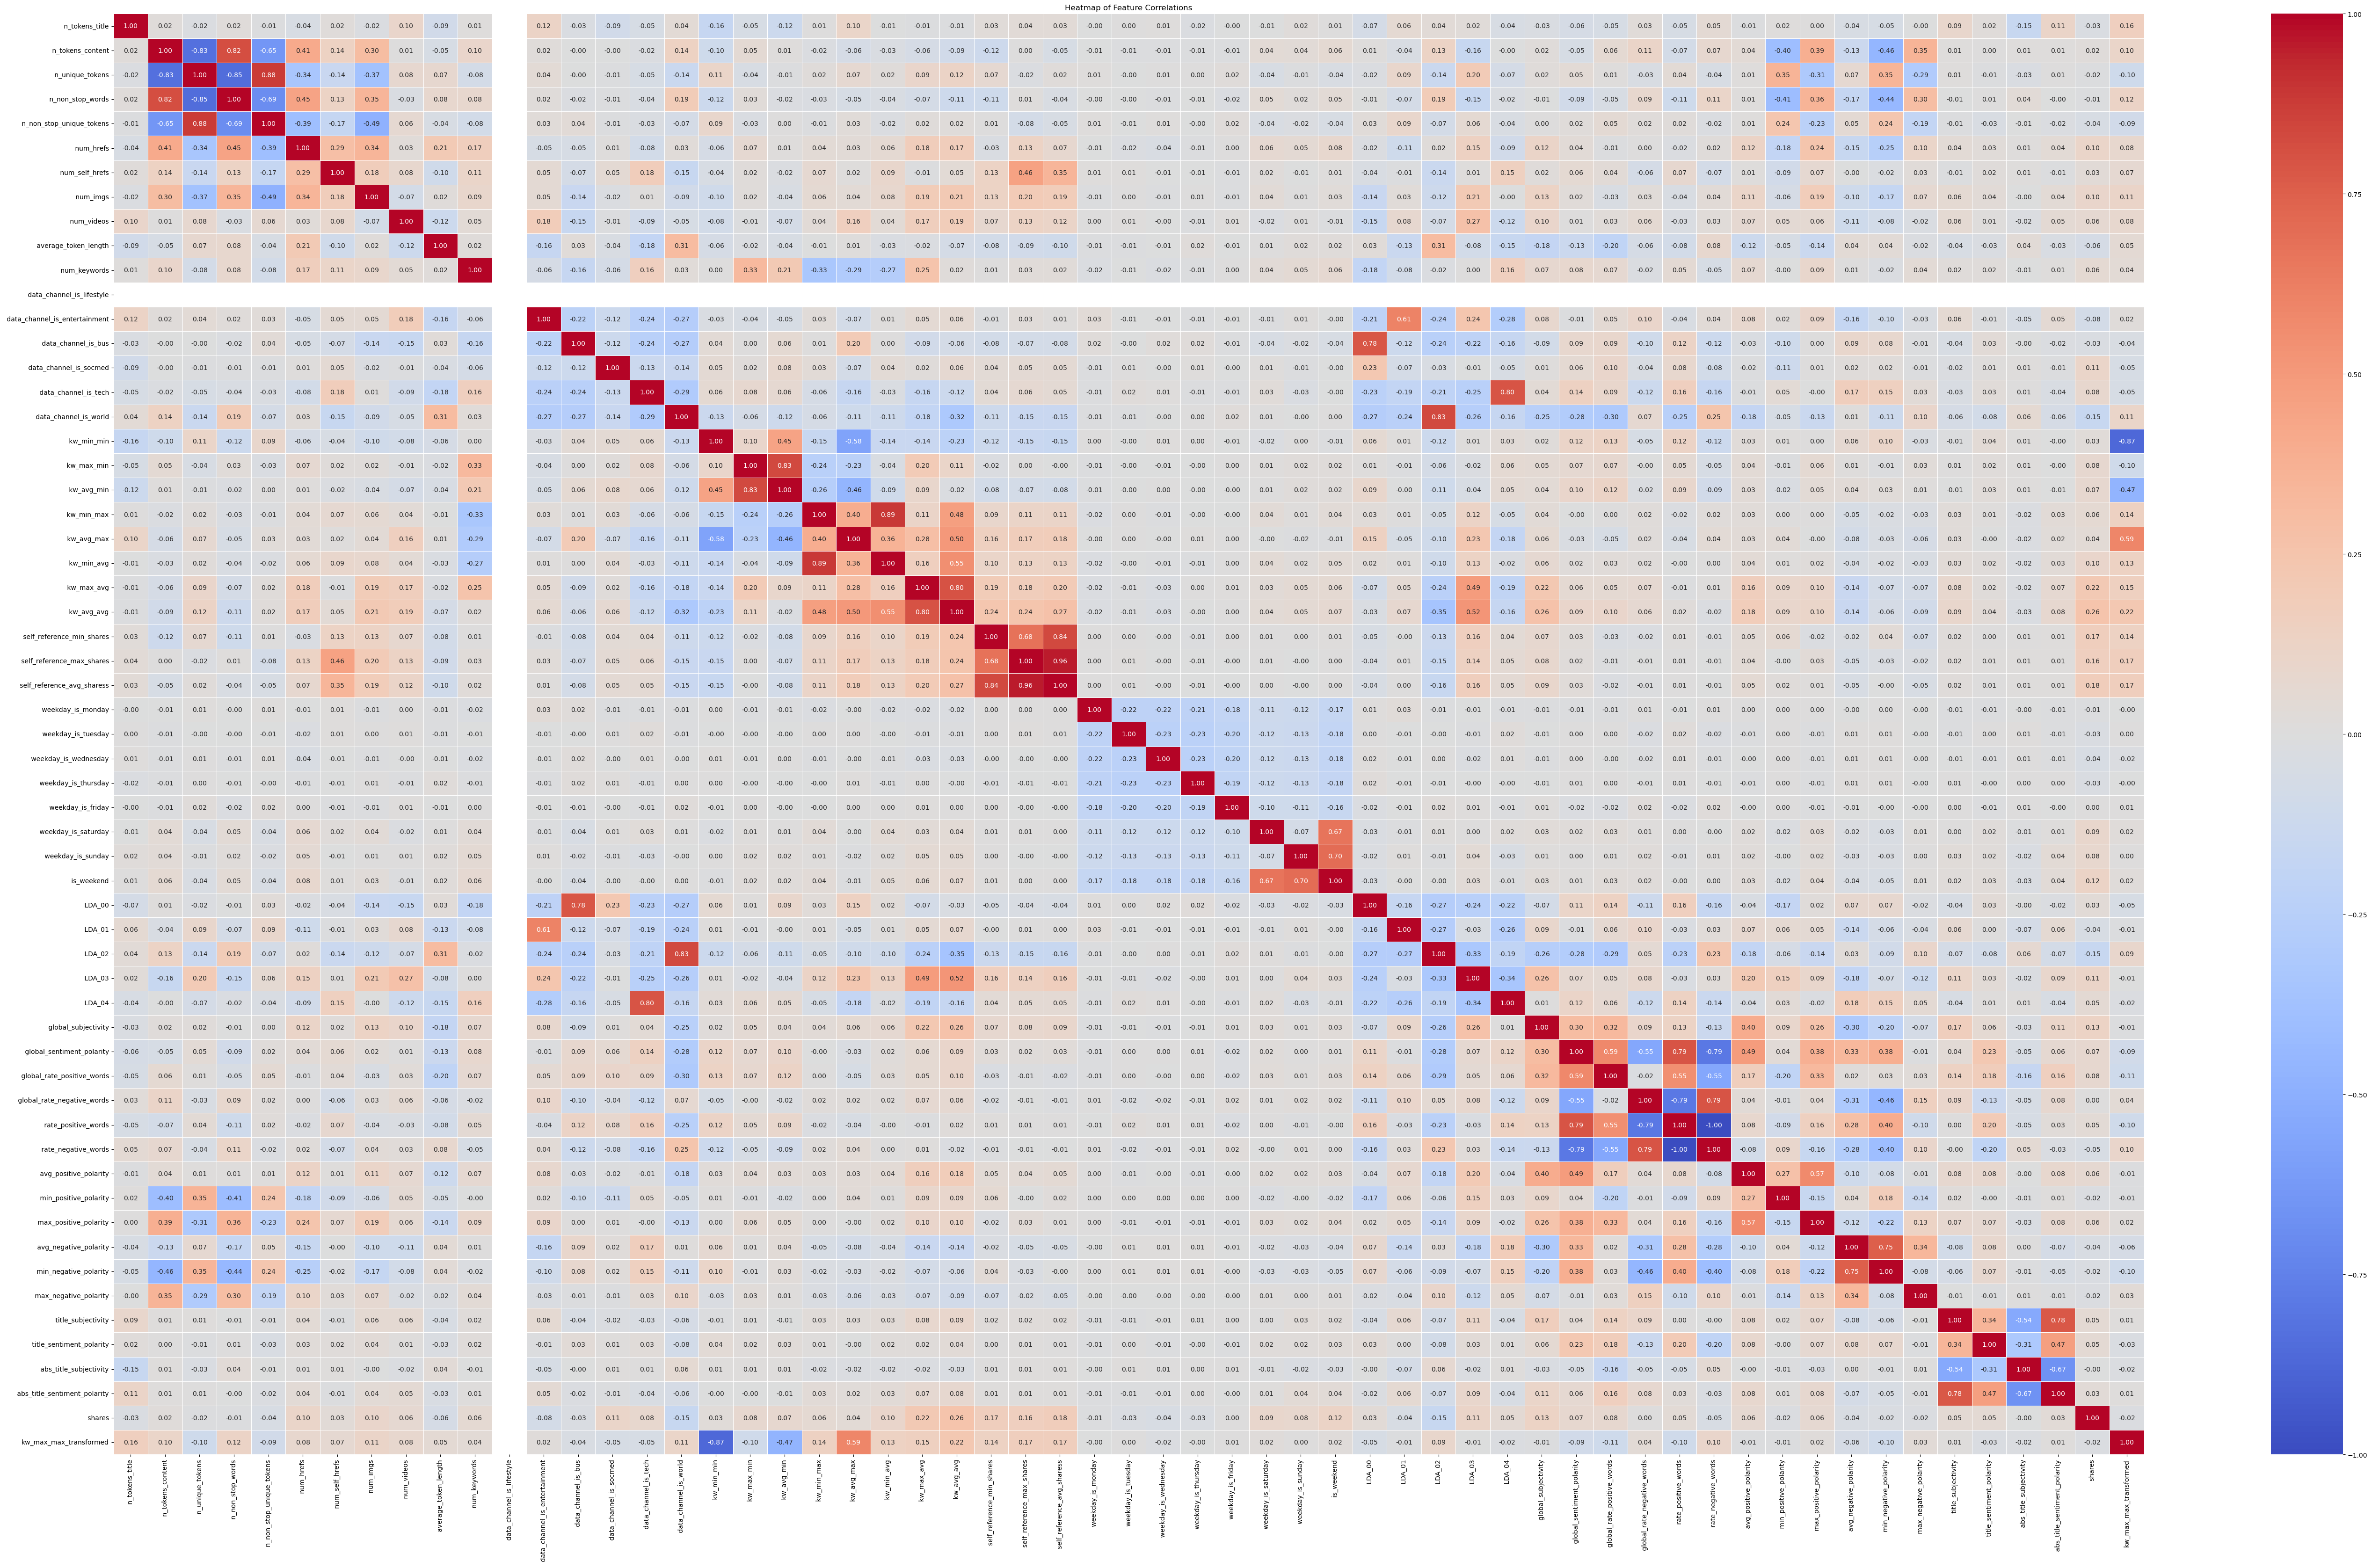

In [93]:
# Compute the correlation matrix
corr_matrix = new_data.corr()

# Create a heatmap
plt.figure(figsize=(70, 40))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Heatmap of Feature Correlations')
plt.show()


**In the heatmap, when the target column shows mostly low-range correlations with other columns, it indicates that the target variable has a weak or negligible linear relationship with most features in the dataset. This means changes in these features are unlikely to have a significant direct impact on the target. However, some columns might still show slightly higher correlations, suggesting those features may have a modest influence on the target. Such insights are valuable for feature selection, helping prioritize features that could be more predictive while reducing noise from weakly related ones**

In [95]:
# Drop the self_reference_avg_sharess column
new_data = new_data.drop(columns=[' self_reference_avg_sharess',' data_channel_is_lifestyle'])


In [96]:
new_data.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min',
       ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_wo

### 10.Barplot

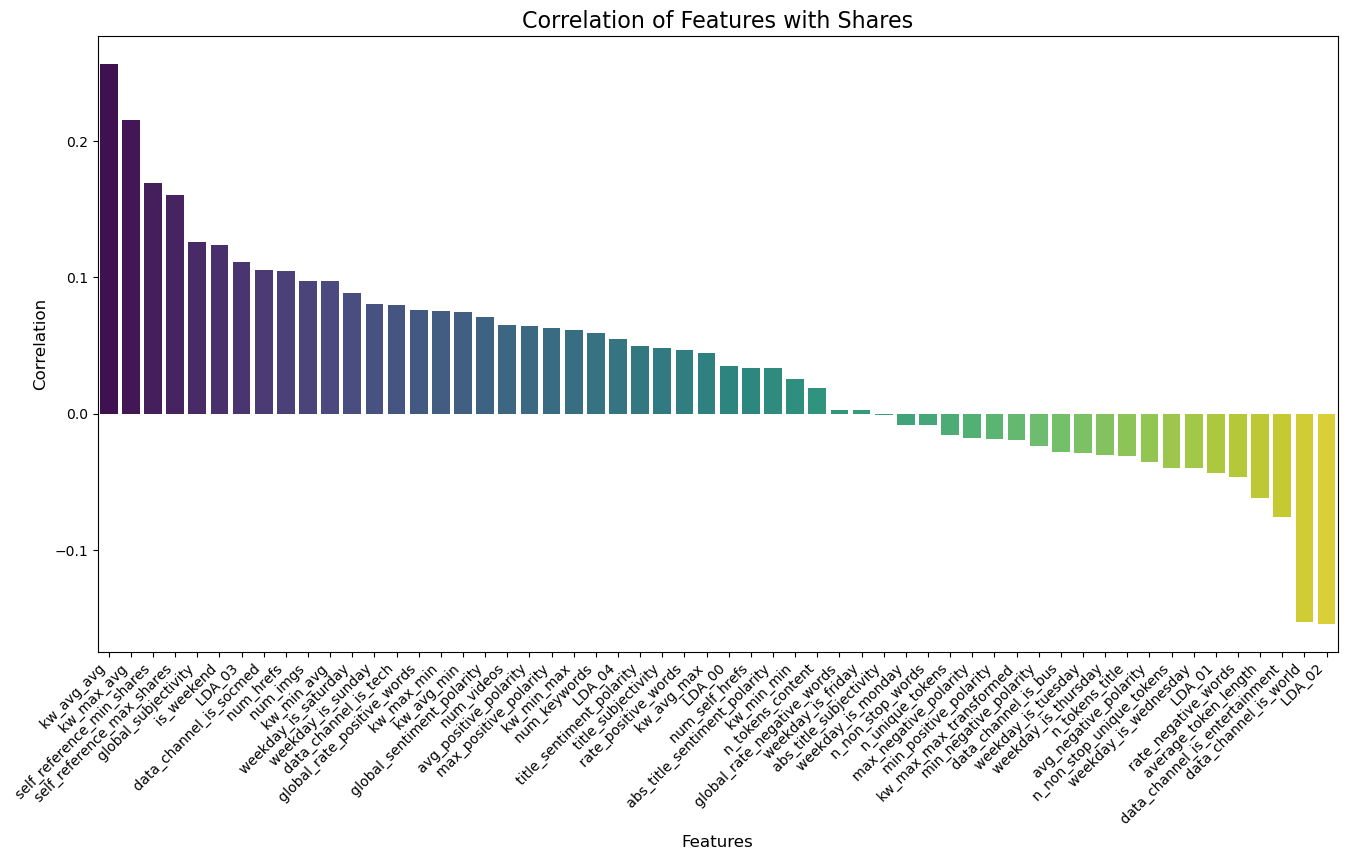

In [98]:

# Compute correlations of all features with the 'shares' column
correlations = new_data.corr()[' shares'].sort_values(ascending=False)

# Drop the correlation of 'shares' with itself (as it's always 1)
correlations = correlations.drop(' shares')

# Create a bar plot
plt.figure(figsize=(16, 8))
sns.barplot(x=correlations.index, y=correlations.values, palette='viridis')

# Customize the plot
plt.title('Correlation of Features with Shares', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for clarity

# Display the plot
plt.show()


**Explonation:The correlation bar plot reveals that all features have weak relationships with the 'share' column, with correlation values falling within the narrow range of 0.2 to -0.2. Positively correlated columns show a slight upward influence on 'shares' , while negatively correlated ones exhibit a modest inverse relationship. This suggests that none of the features have a strong or significant impact on the  'share' column, highlighting limited linear dependencies. Such findings may prompt deeper exploration of non-linear relationships or additional data transformations for better predictive insights.**

**Distribution  (shares)**

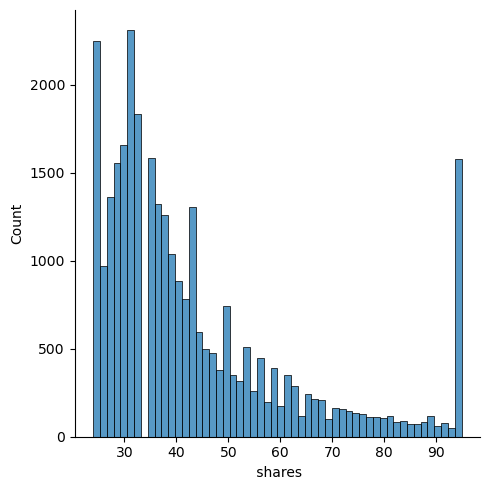

In [101]:
sns.displot(new_data[" shares"])

**Explonation:The displot  shows the distribution of the shasres column, revealing that most share counts are low. However, there are clusters of higher engagement, such as 90 shares around 1500, 40 shares exceeding 1500, and 35 shares above 2000. These patterns highlight popular articles with significant reach, providing a clear view of key trends after outlier removal.**

### Feature selection

In [104]:
# Correlation with target variable
print(new_data.corr()[' shares'].sort_values(ascending=False))

 shares                           1.000000
 kw_avg_avg                       0.256563
 kw_max_avg                       0.215299
 self_reference_min_shares        0.169614
 self_reference_max_shares        0.160491
 global_subjectivity              0.126230
 is_weekend                       0.123550
 LDA_03                           0.111620
 data_channel_is_socmed           0.105804
 num_hrefs                        0.104975
 num_imgs                         0.097206
 kw_min_avg                       0.097018
 weekday_is_saturday              0.088475
 weekday_is_sunday                0.080555
 data_channel_is_tech             0.079526
 global_rate_positive_words       0.076003
 kw_max_min                       0.075443
 kw_avg_min                       0.074403
 global_sentiment_polarity        0.070961
 num_videos                       0.064899
 avg_positive_polarity            0.064036
 max_positive_polarity            0.062777
 kw_min_max                       0.061243
 num_keywor

**The correlations with the 'shares' column are mostly weak, with a few features like 'kw_avg_avg' (0.256563) showing mild positive influence, while others like ' LDA_02 ' (-0.154494) exhibit weak negative correlations. Most values fall within the range of -0.2 to 0.2, indicating limited linear relationships between the features and shares. This suggests the need to explore non-linear patterns or interactions for better predictions.**

### Transforming the Continuous Target into Categories for Classification
**In this project, the target column shares is a continuous variable. However, since the goal is not to predict the exact number of shares, but rather to understand and classify articles based on their popularity level, I transformed it into a classification problem. I created three categories — Low, Medium, and High popularity — which allowed for a more interpretable and meaningful analysis. This approach simplifies the model and focuses on actionable insights rather than precise numeric predictions**

### Quantile-Based Binning (Equal Distribution)

In [108]:
new_data['popularity'], bins = pd.qcut(new_data[' shares'], q=3, labels=[0, 1, 2], retbins=True)

In [109]:
print(new_data['popularity'].value_counts())

popularity
0    11928
2     9718
1     8771
Name: count, dtype: int64


**Based on the distribution of the shares column in the new_data table, I categorized article popularity into three classes using [quantiles]. This transformation enables a classification approach by converting a continuous variable into discrete categories, allowing for more interpretable and balanced modeling.**

### a)Univariate Selection ANOVA F-test
**target (popularity) into classes,  can safely perform feature selection using SelectKBest with f_classif.**



In [112]:
# Make a copy to work on
df = new_data.copy()

# Define input features and target
X = df.drop([' shares', 'popularity'], axis=1)
y = df['popularity']

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Top 10 Selected Features:")
print(selected_features)

Top 10 Selected Features:
Index([' n_non_stop_words', ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' is_weekend', ' LDA_02'],
      dtype='object')


### b)  Feature Importance (from Random Forest) — Fast + Powerful
**✅ Works well with classification**
**✅ Fast, even on 30,000 rows**
**✅ Handles non-linearity and interactions**



In [115]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

import pandas as pd

feature_scores = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_scores.sort_values(ascending=False).head(10)

print("Top 10 Features:")
print(top_features)

Top 10 Features:
kw_avg_avg                   0.042852
kw_max_avg                   0.035666
LDA_02                       0.031651
self_reference_min_shares    0.030048
LDA_04                       0.029410
kw_avg_max                   0.029353
self_reference_max_shares    0.029251
global_subjectivity          0.029247
LDA_00                       0.028997
kw_avg_min                   0.028904
dtype: float64


## Report
**Feature selection was performed using both ANOVA F-test and Random Forest feature importance. The top features identified from both methods included kw_avg_avg, kw_max_avg, LDA_02, and self_reference_min_shares. These features were selected for the classification model to predict article popularity, leveraging both statistical significance (ANOVA) and model-based feature importance (Random Forest).**